In [1]:
import pathlib
pathlib.Path().resolve()

PosixPath('/content')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [5]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
df = df[['title', 'tagline', 'overview', 'genres', 'popularity']]
df.tagline.fillna('', inplace=True)
df['description'] = df['tagline'].map(str) + ' ' + df['overview']
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        4800 non-null   object 
 1   tagline      4800 non-null   object 
 2   overview     4800 non-null   object 
 3   genres       4800 non-null   object 
 4   popularity   4800 non-null   float64
 5   description  4800 non-null   object 
dtypes: float64(1), object(5)
memory usage: 262.5+ KB


/tmp/ipython-input-960522280.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.tagline.fillna('', inplace=True)


In [7]:
df.head()

,title,tagline,overview,genres,popularity,description
0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,Enter the World of Pandora. In the 22nd centur...
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"At the end of the world, the adventure begins...."
2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,A Plan No One Escapes A cryptic message from B...
3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,The Legend Ends Following the death of Distric...
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"Lost in our world, found in another. John Cart..."


In [10]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
import nltk
import re
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(df['description']))
len(norm_corpus)

4800

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

stop_words = stop_words + ['one', 'two', 'get']
cv = CountVectorizer(ngram_range=(1, 2), min_df=10, max_df=0.8, stop_words=stop_words)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix.shape

(4800, 3012)

CLUSTER MOVIE PAKAI K MEANS

In [13]:
from sklearn.cluster import KMeans

NUM_CLUSTERS = 6
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(cv_matrix)
km

KMeans(max_iter=10000, n_clusters=6, n_init=50, random_state=42)

In [14]:
from collections import Counter

Counter(km.labels_)

Counter({np.int32(1): 501,
         np.int32(3): 2994,
         np.int32(5): 244,
         np.int32(2): 439,
         np.int32(0): 621,
         np.int32(4): 1})

In [15]:
df['kmeans_cluster'] = km.labels_

In [16]:
movie_clusters = (df[['title', 'kmeans_cluster', 'popularity']]
                  .sort_values(by=['kmeans_cluster', 'popularity'],
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))
movie_clusters = movie_clusters.copy(deep=True)

In [18]:
feature_names = cv.get_feature_names_out()
topn_features = 15
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index]
                        for index in ordered_centroids[cluster_num, :topn_features]]
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['title'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #1
Key Features: ['life', 'man', 'family', 'young', 'story', 'new', 'back', 'time', 'years', 'death', 'father', 'finds', 'hes', 'son', 'woman']
Popular Movies: ['Deadpool', 'Mad Max: Fury Road', 'Inception', 'The Godfather', 'The Shawshank Redemption', 'Harry Potter and the Chamber of Secrets', 'Batman Begins', 'Maleficent', "Harry Potter and the Philosopher's Stone", 'The Hobbit: An Unexpected Journey', 'Titanic', 'Fifty Shades of Grey', 'Blade Runner', 'Psycho', 'Up', 'The Lion King', 'Taken 3', 'The Bourne Identity', 'The Mask', 'Cars']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['world', 'war', 'young', 'story', 'world war', 'find', 'man', 'must', 'new', 'save', 'time', 'evil', 'way', 'ii', 'war ii']
Popular Movies: ['Minions', 'Jurassic World', 'Captain America: Civil War', 'Batman v Superman: Dawn of Justice', 'Avatar', 'The Imitation Game', 'The Avengers', 'Fury', "Pirates of the Caribbean: At World's End", '

In [24]:
labels = df['genres'].astype(str)

In [25]:
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))

Homogeneity: 0.074
Completeness: 0.360
V-measure: 0.123


K MEANS COSSINE SIMILARITY

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_features = cosine_similarity(cv_matrix)
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(cosine_sim_features)
Counter(km.labels_)

Counter({np.int32(2): 429,
         np.int32(3): 725,
         np.int32(5): 1913,
         np.int32(0): 503,
         np.int32(1): 872,
         np.int32(4): 358})

In [27]:
df['kmeans_cluster'] = km.labels_

movie_clusters = (df[['title', 'kmeans_cluster', 'popularity']]
                  .sort_values(by=['kmeans_cluster', 'popularity'],
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))
movie_clusters = movie_clusters.copy(deep=True)

# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['title'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #1
Popular Movies: ['Terminator Genisys', 'Fight Club', 'Teenage Mutant Ninja Turtles', 'Pixels', 'Despicable Me 2', 'Avengers: Age of Ultron', 'Night at the Museum: Secret of the Tomb', 'Batman Begins', 'The Dark Knight Rises', 'The Lord of the Rings: The Two Towers', 'The Godfather: Part II', 'How to Train Your Dragon 2', '12 Years a Slave', 'The Wolf of Wall Street', 'Men in Black II', "Pan's Labyrinth", 'The Bourne Legacy', 'The Amazing Spider-Man 2', 'The Devil Wears Prada', 'Non-Stop']
--------------------------------------------------------------------------------
CLUSTER #2
Popular Movies: ['Pirates of the Caribbean: The Curse of the Black Pearl', 'Whiplash', 'The Martian', 'Frozen', 'Gone Girl', 'The Lord of the Rings: The Fellowship of the Ring', 'Pirates of the Caribbean: On Stranger Tides', 'Pulp Fiction', 'The Fifth Element', 'Quantum of Solace', 'Furious 7', 'Cinderella', 'Man of Steel', 'Gladiator', 'Aladdin', 'The Amazing Spider-Man', 'Prisoners', 'The Good, the

In [30]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation(max_iter=1000)
ap.fit(cosine_sim_features)
res = Counter(ap.labels_)
res.most_common(10)

[(np.int64(199), 1355),
 (np.int64(182), 93),
 (np.int64(159), 80),
 (np.int64(54), 74),
 (np.int64(81), 57),
 (np.int64(16), 51),
 (np.int64(26), 47),
 (np.int64(24), 45),
 (np.int64(48), 43),
 (np.int64(89), 42)]

In [36]:
df['affprop_cluster'] = ap.labels_
filtered_clusters = [item[0] for item in res.most_common(8)]
filtered_df = df[df['affprop_cluster'].isin(filtered_clusters)]
movie_clusters = (filtered_df[['title', 'affprop_cluster', 'popularity']]
                  .sort_values(by=['affprop_cluster', 'popularity'],
                               ascending=False)
                  .groupby('affprop_cluster').head(20))
movie_clusters = movie_clusters.copy(deep=True)

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(len(filtered_clusters)):
    movies = movie_clusters[movie_clusters['affprop_cluster'] == filtered_clusters[cluster_num]]['title'].values.tolist()
    print('CLUSTER #'+str(filtered_clusters[cluster_num]))
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #199
Popular Movies: ['Interstellar', 'Dawn of the Planet of the Apes', 'Big Hero 6', 'The Dark Knight', "Pirates of the Caribbean: Dead Man's Chest", 'The Hunger Games: Mockingjay - Part 2', 'Star Wars', 'Brave', 'The Lord of the Rings: The Return of the King', 'The Hobbit: The Battle of the Five Armies', 'Iron Man', 'Transformers: Age of Extinction', 'Lucy', 'Mission: Impossible - Rogue Nation', 'Maze Runner: The Scorch Trials', 'Spectre', 'The Green Mile', 'Terminator 2: Judgment Day', 'Exodus: Gods and Kings', 'Harry Potter and the Goblet of Fire']
--------------------------------------------------------------------------------
CLUSTER #182
Popular Movies: ['Inception', 'Harry Potter and the Chamber of Secrets', 'The Hobbit: An Unexpected Journey', 'Django Unchained', 'American Beauty', 'Snowpiercer', 'Trainspotting', 'First Blood', 'The Bourne Supremacy', 'Yes Man', 'The Secret Life of Walter Mitty', 'RED', 'Casino', 'The Passion of the Christ', 'Annie', 'Fantasia', 'Vicky

Hirarchichal Clustering

In [37]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

In [39]:
def ward_hierarchical_clustering(feature_matrix):

    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

In [42]:
def plot_hierarchical_clusters(linkage_matrix, movie_data, p=100, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size)
    movie_titles = movie_data['title'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=movie_titles,
                    truncate_mode='lastp',
                    p=p,
                    no_plot=True)
    temp = {R["leaves"][ii]: movie_titles[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,
            leaf_label_func=llf,
            leaf_font_size=10.,
            )
    plt.tick_params(axis= 'x',
                    which='both',
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
    plt.savefig('movie_hierachical_clusters.png', dpi=200)

In [43]:
linkage_matrix = ward_hierarchical_clustering(cv_matrix)

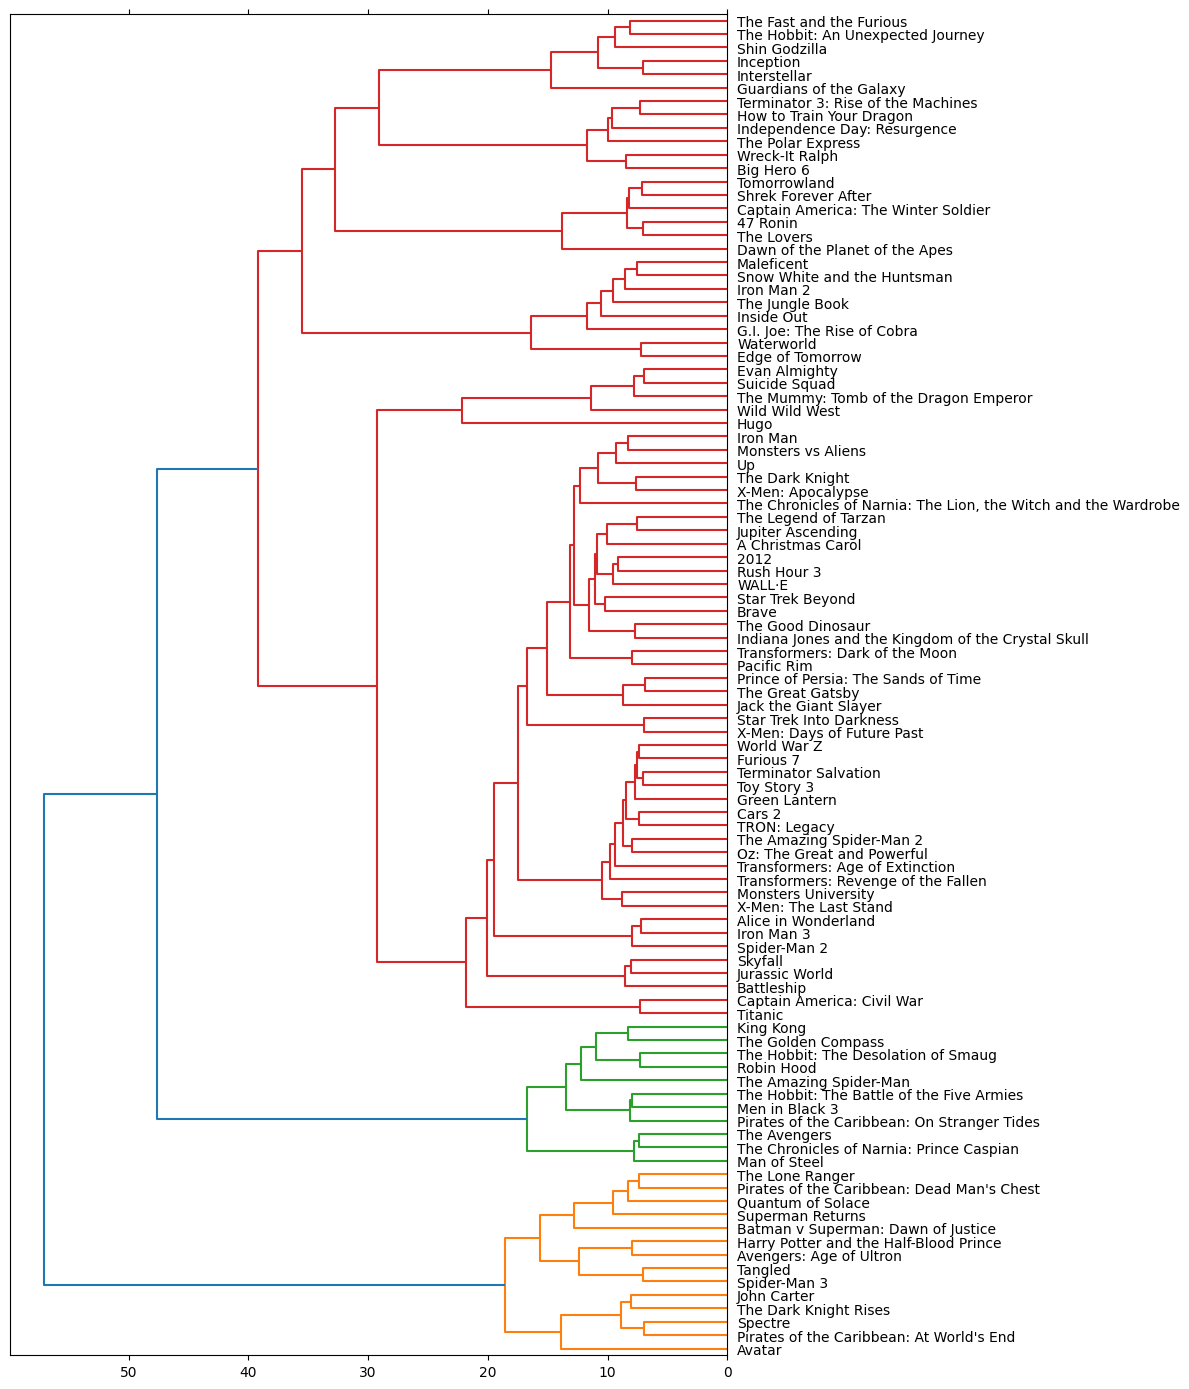

In [44]:
plot_hierarchical_clusters(linkage_matrix,
                           p=100,
                           movie_data=df,
                           figure_size=(12, 14))